# import Libraries

In [193]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Problem Statement

In [194]:
#To pedict the price of cars by using varoius features

# Data Gathering

In [195]:
df = pd.read_csv('autos_dataset.csv')
df


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [196]:
df.head().T

,0,1,2,3,4
symboling,3,3,1,2,2
normalized-losses,?,?,?,164,164
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel-type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num-of-doors,two,two,two,four,four
body-style,convertible,convertible,hatchback,sedan,sedan
drive-wheels,rwd,rwd,rwd,fwd,4wd
engine-location,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,99.4


# EDA

In [197]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# 1. symboling

In [199]:
df["symboling"]

0      3
1      3
2      1
3      2
4      2
      ..
200   -1
201   -1
202   -1
203   -1
204   -1
Name: symboling, Length: 205, dtype: int64

# 2.normalized-losses

In [200]:
df["normalized-losses"]

0        ?
1        ?
2        ?
3      164
4      164
      ... 
200     95
201     95
202     95
203     95
204     95
Name: normalized-losses, Length: 205, dtype: object

In [201]:
df["normalized-losses"].replace({"?":np.nan},inplace=True)

In [202]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [203]:
df.replace({"?":np.nan},inplace=True)

In [204]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [205]:
df.isna().mean() * 100  # percentage of null values

symboling             0.00000
normalized-losses    20.00000
make                  0.00000
fuel-type             0.00000
aspiration            0.00000
num-of-doors          0.97561
body-style            0.00000
drive-wheels          0.00000
engine-location       0.00000
wheel-base            0.00000
length                0.00000
width                 0.00000
height                0.00000
curb-weight           0.00000
engine-type           0.00000
num-of-cylinders      0.00000
engine-size           0.00000
fuel-system           0.00000
bore                  1.95122
stroke                1.95122
compression-ratio     0.00000
horsepower            0.97561
peak-rpm              0.97561
city-mpg              0.00000
highway-mpg           0.00000
price                 1.95122
dtype: float64

In [206]:
df["normalized-losses"] = df["normalized-losses"].astype(float)  # type casting>> object to float

In [207]:
df["normalized-losses"].mean()

122.0

In [208]:
df["normalized-losses"].median()

115.0

In [1]:
df["normalized-losses"] = df["normalized-losses"].fillna(df["normalized-losses"].median())

NameError: name 'df' is not defined

In [210]:
df["normalized-losses"]

0      115.0
1      115.0
2      115.0
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, Length: 205, dtype: float64

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# 3.make

In [212]:
df["make"]

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: make, Length: 205, dtype: object

In [213]:
df["make"].nunique()

22

In [214]:
df["make"].value_counts()

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
bmw               8
mercedes-benz     8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
chevrolet         3
jaguar            3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

# 4.fuel type

In [215]:
df["fuel-type"].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

In [216]:
df["fuel-type"].replace({'gas':1,"diesel":0},inplace=True)

In [217]:
df["fuel-type"].value_counts()

1    185
0     20
Name: fuel-type, dtype: int64

# 5.aspiration

In [218]:
df["aspiration"]

0        std
1        std
2        std
3        std
4        std
       ...  
200      std
201    turbo
202      std
203    turbo
204    turbo
Name: aspiration, Length: 205, dtype: object

In [219]:
df["aspiration"].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [220]:
df["aspiration"].value_counts().to_dict()

{'std': 168, 'turbo': 37}

In [221]:
df["aspiration"].replace({'std': 0, 'turbo': 1},inplace=True)

In [222]:
#df["aspiration"]

In [223]:
#\df.info()

# 6.num-of-doors

In [224]:
df["num-of-doors"]

0       two
1       two
2       two
3      four
4      four
       ... 
200    four
201    four
202    four
203    four
204    four
Name: num-of-doors, Length: 205, dtype: object

In [225]:
df["num-of-doors"].value_counts().to_dict()

{'four': 114, 'two': 89}

In [226]:
df["num-of-doors"].replace({'four': 4, 'two': 2},inplace=True)

In [227]:
df["num-of-doors"].mode()[0]

4.0

In [228]:
df["num-of-doors"].fillna(df["num-of-doors"].mode()[0],inplace=True)

# 7. body_style

In [229]:
df["body-style"]

0      convertible
1      convertible
2        hatchback
3            sedan
4            sedan
          ...     
200          sedan
201          sedan
202          sedan
203          sedan
204          sedan
Name: body-style, Length: 205, dtype: object

In [230]:
df["body-style"].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [231]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,1,0,2.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,115.0,alfa-romero,1,0,2.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,115.0,alfa-romero,1,0,2.0,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,1,0,4.0,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,1,0,4.0,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,1,0,4.0,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95.0,volvo,1,1,4.0,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95.0,volvo,1,0,4.0,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95.0,volvo,0,1,4.0,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [232]:
df = pd.get_dummies(df,columns=["body-style"])
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
0,3,115.0,alfa-romero,1,0,2.0,rwd,front,88.6,168.8,...,111,5000,21,27,13495,1,0,0,0,0
1,3,115.0,alfa-romero,1,0,2.0,rwd,front,88.6,168.8,...,111,5000,21,27,16500,1,0,0,0,0
2,1,115.0,alfa-romero,1,0,2.0,rwd,front,94.5,171.2,...,154,5000,19,26,16500,0,0,1,0,0
3,2,164.0,audi,1,0,4.0,fwd,front,99.8,176.6,...,102,5500,24,30,13950,0,0,0,1,0
4,2,164.0,audi,1,0,4.0,4wd,front,99.4,176.6,...,115,5500,18,22,17450,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,1,0,4.0,rwd,front,109.1,188.8,...,114,5400,23,28,16845,0,0,0,1,0
201,-1,95.0,volvo,1,1,4.0,rwd,front,109.1,188.8,...,160,5300,19,25,19045,0,0,0,1,0
202,-1,95.0,volvo,1,0,4.0,rwd,front,109.1,188.8,...,134,5500,18,23,21485,0,0,0,1,0
203,-1,95.0,volvo,0,1,4.0,rwd,front,109.1,188.8,...,106,4800,26,27,22470,0,0,0,1,0


# 8.drive-wheels

In [233]:
df["drive-wheels"].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [234]:
df["drive-wheels"].value_counts().to_dict()

{'fwd': 120, 'rwd': 76, '4wd': 9}

In [235]:
df["drive-wheels"].replace({'fwd': 0, 'rwd': 1, '4wd': 2},inplace=True)

In [236]:
df["drive-wheels"]

0      1
1      1
2      1
3      0
4      2
      ..
200    1
201    1
202    1
203    1
204    1
Name: drive-wheels, Length: 205, dtype: int64

# 9.engine-location

In [237]:
df["engine-location"].value_counts()

front    202
rear       3
Name: engine-location, dtype: int64

In [238]:
df["engine-location"].replace({'front': 1, 'rear': 0,},inplace=True)

# 10.wheel-base

In [239]:
df["wheel-base"]

0       88.6
1       88.6
2       94.5
3       99.8
4       99.4
       ...  
200    109.1
201    109.1
202    109.1
203    109.1
204    109.1
Name: wheel-base, Length: 205, dtype: float64

# 11.engine-size

In [240]:
df["engine-size"]

0      130
1      130
2      152
3      109
4      136
      ... 
200    141
201    141
202    173
203    145
204    141
Name: engine-size, Length: 205, dtype: int64

# 12.engine-type

In [241]:
df["engine-type"]

0      dohc
1      dohc
2      ohcv
3       ohc
4       ohc
       ... 
200     ohc
201     ohc
202    ohcv
203     ohc
204     ohc
Name: engine-type, Length: 205, dtype: object

In [242]:
df["engine-type"].value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

In [243]:
df = pd.get_dummies(df,columns=["engine-type"])
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,...,body-style_hatchback,body-style_sedan,body-style_wagon,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
0,3,115.0,alfa-romero,1,0,2.0,1,1,88.6,168.8,...,0,0,0,1,0,0,0,0,0,0
1,3,115.0,alfa-romero,1,0,2.0,1,1,88.6,168.8,...,0,0,0,1,0,0,0,0,0,0
2,1,115.0,alfa-romero,1,0,2.0,1,1,94.5,171.2,...,1,0,0,0,0,0,0,0,1,0
3,2,164.0,audi,1,0,4.0,0,1,99.8,176.6,...,0,1,0,0,0,0,1,0,0,0
4,2,164.0,audi,1,0,4.0,2,1,99.4,176.6,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,1,0,4.0,1,1,109.1,188.8,...,0,1,0,0,0,0,1,0,0,0
201,-1,95.0,volvo,1,1,4.0,1,1,109.1,188.8,...,0,1,0,0,0,0,1,0,0,0
202,-1,95.0,volvo,1,0,4.0,1,1,109.1,188.8,...,0,1,0,0,0,0,0,0,1,0
203,-1,95.0,volvo,0,1,4.0,1,1,109.1,188.8,...,0,1,0,0,0,0,1,0,0,0


In [244]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'drive-wheels', 'engine-location', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'body-style_convertible', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon', 'engine-type_dohc',
       'engine-type_dohcv', 'engine-type_l', 'engine-type_ohc',
       'engine-type_ohcf', 'engine-type_ohcv', 'engine-type_rotor'],
      dtype='object')

# 12.num-of-cylinders

In [245]:
df["num-of-cylinders"]

0      four
1      four
2       six
3      four
4      five
       ... 
200    four
201    four
202     six
203     six
204    four
Name: num-of-cylinders, Length: 205, dtype: object

In [246]:
df["num-of-cylinders"].value_counts().to_dict()

{'four': 159,
 'six': 24,
 'five': 11,
 'eight': 5,
 'two': 4,
 'three': 1,
 'twelve': 1}

In [247]:
df["num-of-cylinders"].replace({'four': 4, 'six': 6,'five': 5,'eight': 8,
                                'two': 2,'three': 3,'twelve': 12},inplace=True)

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    float64
 2   make                    205 non-null    object 
 3   fuel-type               205 non-null    int64  
 4   aspiration              205 non-null    int64  
 5   num-of-doors            205 non-null    float64
 6   drive-wheels            205 non-null    int64  
 7   engine-location         205 non-null    int64  
 8   wheel-base              205 non-null    float64
 9   length                  205 non-null    float64
 10  width                   205 non-null    float64
 11  height                  205 non-null    float64
 12  curb-weight             205 non-null    int64  
 13  num-of-cylinders        205 non-null    int64  
 14  engine-size             205 non-null    in

# 13.fuel-system

In [249]:
df["fuel-system"].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

In [250]:
df = pd.get_dummies(df,columns=["fuel-system"])
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,115.0,alfa-romero,1,0,2.0,1,1,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
1,3,115.0,alfa-romero,1,0,2.0,1,1,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
2,1,115.0,alfa-romero,1,0,2.0,1,1,94.5,171.2,...,1,0,0,0,0,0,0,1,0,0
3,2,164.0,audi,1,0,4.0,0,1,99.8,176.6,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,audi,1,0,4.0,2,1,99.4,176.6,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,1,0,4.0,1,1,109.1,188.8,...,0,0,0,0,0,0,0,1,0,0
201,-1,95.0,volvo,1,1,4.0,1,1,109.1,188.8,...,0,0,0,0,0,0,0,1,0,0
202,-1,95.0,volvo,1,0,4.0,1,1,109.1,188.8,...,1,0,0,0,0,0,0,1,0,0
203,-1,95.0,volvo,0,1,4.0,1,1,109.1,188.8,...,0,0,0,0,0,1,0,0,0,0


In [251]:
df.isna().sum()

symboling                 0
normalized-losses         0
make                      0
fuel-type                 0
aspiration                0
num-of-doors              0
drive-wheels              0
engine-location           0
wheel-base                0
length                    0
width                     0
height                    0
curb-weight               0
num-of-cylinders          0
engine-size               0
bore                      4
stroke                    4
compression-ratio         0
horsepower                2
peak-rpm                  2
city-mpg                  0
highway-mpg               0
price                     4
body-style_convertible    0
body-style_hardtop        0
body-style_hatchback      0
body-style_sedan          0
body-style_wagon          0
engine-type_dohc          0
engine-type_dohcv         0
engine-type_l             0
engine-type_ohc           0
engine-type_ohcf          0
engine-type_ohcv          0
engine-type_rotor         0
fuel-system_1bbl    

In [252]:
df["bore"] = df["bore"].fillna(df["bore"].median()).astype(float)
df["stroke"] = df["stroke"].fillna(df["stroke"].median()).astype(float)
df["horsepower"] = df["horsepower"].fillna(df["horsepower"].median()).astype(float)
df["peak-rpm"] = df["peak-rpm"].fillna(df["peak-rpm"].median()).astype(float)
df["price"] = df["price"].fillna(df["price"].median()).astype(float)


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    float64
 2   make                    205 non-null    object 
 3   fuel-type               205 non-null    int64  
 4   aspiration              205 non-null    int64  
 5   num-of-doors            205 non-null    float64
 6   drive-wheels            205 non-null    int64  
 7   engine-location         205 non-null    int64  
 8   wheel-base              205 non-null    float64
 9   length                  205 non-null    float64
 10  width                   205 non-null    float64
 11  height                  205 non-null    float64
 12  curb-weight             205 non-null    int64  
 13  num-of-cylinders        205 non-null    int64  
 14  engine-size             205 non-null    in

# Train Test Split

In [254]:
df = df.select_dtypes(exclude=object) # Only considered numeric datatype column to save time, you can convert all columns in to numeric and built model on that
df

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,115.0,1,0,2.0,1,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,3,115.0,1,0,2.0,1,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,1,115.0,1,0,2.0,1,1,94.5,171.2,65.5,...,1,0,0,0,0,0,0,1,0,0
3,2,164.0,1,0,4.0,0,1,99.8,176.6,66.2,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,1,0,4.0,2,1,99.4,176.6,66.4,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,1,0,4.0,1,1,109.1,188.8,68.9,...,0,0,0,0,0,0,0,1,0,0
201,-1,95.0,1,1,4.0,1,1,109.1,188.8,68.8,...,0,0,0,0,0,0,0,1,0,0
202,-1,95.0,1,0,4.0,1,1,109.1,188.8,68.9,...,1,0,0,0,0,0,0,1,0,0
203,-1,95.0,0,1,4.0,1,1,109.1,188.8,68.9,...,0,0,0,0,0,1,0,0,0,0


In [257]:
df.columns

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'drive-wheels', 'engine-location', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'body-style_convertible', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon', 'engine-type_dohc',
       'engine-type_dohcv', 'engine-type_l', 'engine-type_ohc',
       'engine-type_ohcf', 'engine-type_ohcv', 'engine-type_rotor',
       'fuel-system_1bbl', 'fuel-system_2bbl', 'fuel-system_4bbl',
       'fuel-system_idi', 'fuel-system_mfi', 'fuel-system_mpfi',
       'fuel-system_spdi', 'fuel-system_spfi'],
      dtype='object')

In [256]:
x = df.drop("price",axis=1)
y = df["price"]

In [258]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=34)

In [262]:
x_train

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
203,-1,95.0,0,1,4.0,1,1,109.1,188.8,68.9,...,0,0,0,0,0,1,0,0,0,0
204,-1,95.0,1,1,4.0,1,1,109.1,188.8,68.9,...,0,0,0,0,0,0,0,1,0,0
52,1,104.0,1,0,2.0,0,1,93.1,159.1,64.2,...,0,0,0,1,0,0,0,0,0,0
2,1,115.0,1,0,2.0,1,1,94.5,171.2,65.5,...,1,0,0,0,0,0,0,1,0,0
46,2,115.0,1,0,2.0,1,1,96.0,172.6,65.2,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,-1,93.0,0,1,4.0,1,1,110.0,190.9,70.3,...,0,0,0,0,0,1,0,0,0,0
85,1,125.0,1,0,4.0,0,1,96.3,172.4,65.4,...,0,0,0,1,0,0,0,0,0,0
105,3,194.0,1,1,2.0,1,1,91.3,170.7,67.9,...,1,0,0,0,0,0,0,1,0,0
122,1,154.0,1,0,4.0,0,1,93.7,167.3,63.8,...,0,0,0,1,0,0,0,0,0,0


# Model Train

In [261]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [263]:
model.intercept_

-5689.181169540225

# 1.Normality of residule

In [ ]:
1.Normality of residule:
    1.Density plot(kdeplot)
    2.qq plot
    3.Shapiro test
    4.KS Test
    5.Normality

# Residule

In [268]:
y_pred = model.predict(x_test)
residule = y_test-y_pred
residule

47     -3391.567894
193     2085.582231
83      1021.551232
151     -845.864913
144       32.609671
91       233.158807
125     4783.697519
40      3149.083032
26       528.268994
53      -101.096711
10      2557.071667
134   -18810.404000
188     -273.222061
169    -2526.546313
147     1922.908298
104     1033.015843
165      254.760726
162     2022.078380
93      3428.769199
167    -4702.219322
123    -2224.861593
178    -3667.552541
3       2768.417826
76     -2649.912503
79       212.852685
192     2927.694815
14      5363.880680
86     -1638.215358
131     3087.768510
30      1837.153835
50      -922.870049
145    -1104.056619
24       -31.491766
127     1113.558666
200    -1268.227033
110    -2574.224676
133     -914.213630
111    -6092.863617
176     1308.372967
142      396.036195
71      3931.681151
Name: price, dtype: float64

### 1.Density Plot

<AxesSubplot:xlabel='price', ylabel='Density'>

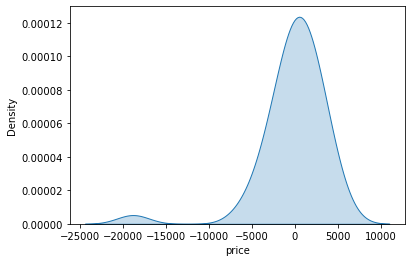

In [270]:
sns.kdeplot(residule,fill = True)

# Shapiro test

In [ ]:
Hypothesis Testing

Null Hypothesis >> Data is normally distributed
Alternate Hypothesis >> Data is not normally distributed

Accept >> Null Hypothesis >> If your p_value is greater than 5% (0.05)
Reject >> If your p_value is less than or equal 5% (0.05)


p_val = 0.05

if p_val > 0.05 :
    print("Accepting null hypothesis")
    
else:
    print("Rejecting Null Hypothesis")

In [271]:
from scipy.stats import shapiro, normaltest,kstest

In [273]:
_,p_val = shapiro(residule)
print("P value is :",p_val)

if p_val > 0.05 :
    print("Data is normally distributed")
    
else:
    print("Data is not normally distributed")


P value is : 1.8695350263442378e-06
Data is not normally distributed


# 2. Normaltest

In [274]:
_,p_val = normaltest(residule)
print("P value is :",p_val)

if p_val > 0.05 :
    print("Data is normally distributed")
    
else:
    print("Data is not normally distributed")

P value is : 6.01382731306557e-11
Data is not normally distributed


# KS test(Kolmogorov–Smirnov test)

In [276]:
_,p_val = kstest(residule,'norm')
print("P value is :",p_val)

if p_val > 0.05 :
    print("Data is normally distributed")
    
else:
    print("Data is not normally distributed")

P value is : 1.0855898494490383e-12
Data is not normally distributed


# QQ Plot

In [277]:
import scipy.stats as sts
import statsmodels.api as sm

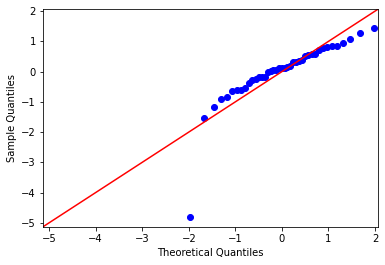

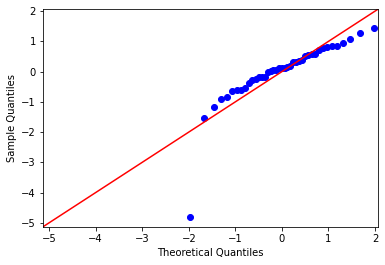

In [278]:
sm.qqplot(residule,line = '45',dist = sts.norm,fit = True)

In [282]:
normal_arry = np.random.randn(100)
normal_arry

array([-1.88379821,  0.87794027,  0.84883922, -0.75863319, -1.14881021,
       -1.25804788, -0.80884417, -1.43899722,  0.02733012,  1.42667076,
        0.69528951,  0.86238804,  0.05494493,  0.25515521,  0.69072836,
       -0.777383  , -0.86263788, -0.46327186, -0.54392473,  1.4883262 ,
        0.31646505, -0.13612909, -2.00571249, -0.86910222, -0.8636578 ,
        1.5318553 ,  0.03468888,  0.03916735,  2.29450889,  0.44732463,
       -2.41542442,  0.10575076,  0.76997356,  0.23152149, -2.32312719,
        2.60428456,  1.28703991,  0.86746863,  1.09391752,  0.97980561,
        2.08526963,  0.74483761, -1.6940865 , -0.64640564,  1.47959965,
        0.61269726,  0.1953615 ,  0.5636626 ,  1.70203587, -0.20880752,
       -0.29727642,  0.04884632,  0.59572809,  0.05602872, -1.38728092,
       -1.3453515 ,  1.12004817,  1.33961239, -0.43113246, -1.52036673,
       -0.26927769,  1.86362272, -0.61388651, -0.00664786,  0.54780578,
        0.93425321,  0.37394701, -1.26092516,  0.23062847,  0.20

<AxesSubplot:ylabel='Density'>

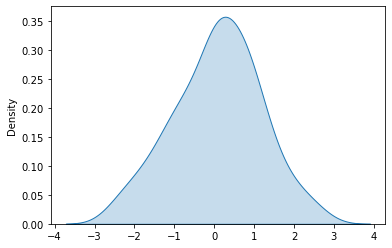

In [283]:
sns.kdeplot(normal_arry,fill = True)

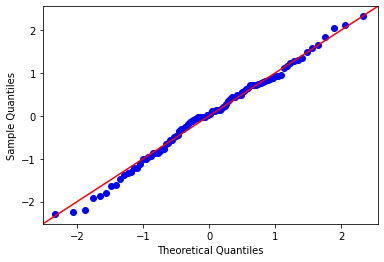

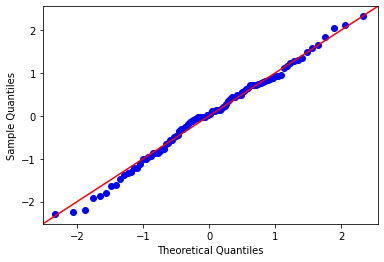

In [284]:
sm.qqplot(normal_arry,line = '45',dist = sts.norm,fit = True)

In [285]:
_,p_val = shapiro(normal_arry)
print("P value is :",p_val)

if p_val > 0.05 :
    print("Data is normally distributed")
    
else:
    print("Data is not normally distributed")

P value is : 0.6467943787574768
Data is normally distributed


# Assumption of Homoscedasticity

In [ ]:
Error terms must have constant Variance

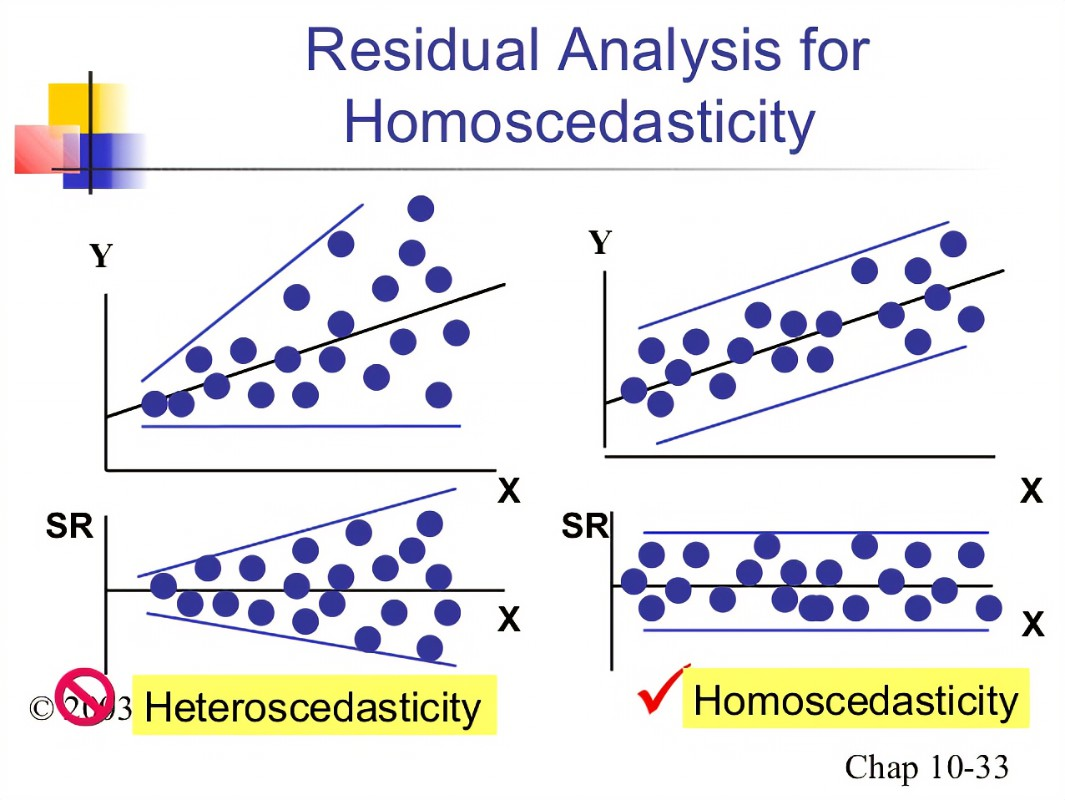

# MOdel Evaluation

In [264]:
#Testing Data Evalauation
y_pred = model.predict(x_test)
y_pred[20:25]

array([11145.861593  , 20225.5525414 , 11181.58217364,  8038.91250302,
        7476.14731518])

In [265]:
y_test[20:25] # Y actual

123     8921.0
178    16558.0
3      13950.0
76      5389.0
79      7689.0
Name: price, dtype: float64

In [266]:
mse = mean_squared_error(y_test,y_pred)
print("MSE:",mse)

rmse = np.sqrt(mse)
print("RMSE;",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE:",mae)

r2 = r2_score(y_test,y_pred)
print("R2_Score:",r2)

MSE: 14957825.671926493
RMSE; 3867.534831378574
MAE: 2432.667890927135
R2_Score: 0.7148417940529204


In [267]:
#Training data Evalaution

y_pred_train = model.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print("MSE:",mse)

rmse = np.sqrt(mse)
print("RMSE;",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE:",mae)

r2 = r2_score(y_train,y_pred_train)
print("R2_Score:",r2)

MSE: 4932870.406966667
RMSE; 2221.0066201987484
MAE: 1583.5902778985119
R2_Score: 0.9230093118649519


In [290]:
import pickle

In [292]:
with open("Model.pkl",'wb') as f:
    pickle.dump(model,f)

# Apply ridge and lasso and check model performance